Getting started with TextBlob for Sentiment Analysis

The first thing you'll need to do is install TextBlob. This could end up being nearly effortless, taking you all of two minutes, or a deep descent into the abyss. Fortunately you can use one of my interactive Jupyter notebooks online if you encounter technical problems. Ideally, however, you want your own installation on your own machine. Here are instructions:

--For both Mac and Windows operating systems, you'll want to open a console or terminal window. The relevant application on Mac machines is "Terminal."
--Point your browser to the TextBlob documentation page and follow the instructions for your operating system:
https://textblob.readthedocs.io/en/dev/install.html
--Note that when typing in the relevant commands, you should omit the "$" sign

If you'd like to experiment with installing TextBlob directly from a Jupyter notebook instead of a terminal or console window, follow the instructions here: https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

Optional: Download (or upload) a copy of Emily Bronte's Wuthering Heights to the proper directory on your computer following the same procedure you used for the Sea Rose poem a week or two ago. To obtain a copy of the novel, point your browser to Project Gutenberg and select the "plain text UTF 8" format: https://www.gutenberg.org/ebooks/768
To refresh your memory about how to save the novel in your text editor and upload it to Jupyter Notebook, head over to the Google Doc I created with instructions: https://docs.google.com/document/d/1qwXYbobcfj4-uHCsbTaFq88-h4U6xGhRT16y-C-U7MM/edit?usp=sharing 

Once you've installed the TextBlob packages and downloaded (or uploaded) Emily Bronte's Wuthering Heights to the proper directory, you're ready to open a new Jupyter notebook and start playing. The rest of the code in this notebook should now work.If you're working directly from my online interactive notebook, you don't need to worry about any of the installations (either TextBlob or Wuthering Heights). You can just start executing and typing code. If you get an automated message or prompt from the system to type in one or two additional lines of code for TextBlob to work in my online notebook, simply enter the relevant commands. 

FYI: omit the first three lines of code in the cell immediately beneath this one if you are working with your own installation of TextBlob in your own Jupyter notebook. Instead, start with the cell that begins "from textblob . . ." If, however, you're using my online interactive notebook to execute code, include the code in the first cell below). 

In [32]:
import nltk
nltk.download('punkt')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to /Users/kari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/kari/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [33]:
from textblob import TextBlob

In [34]:
TextBlob('A house of deadly chambers').sentiment

Sentiment(polarity=-0.2, subjectivity=0.4)

In [35]:
TextBlob('inhabited by evil spirits').sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [36]:
TextBlob('lit by gruesome torches').sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [37]:
TextBlob('This movie was a great experience, and not disappointing.').sentiment

Sentiment(polarity=0.55, subjectivity=0.725)

In [55]:
TextBlob('The Biltong was dying. Huge and old, it squatted in the center of the settlement park, a lump of ancient yellow protoplasm, thick, gummy, opaque. Its pseudopodia were dried up, shriveled to blackened snakes that lay inert on the brown grass.').sentiment

Sentiment(polarity=-0.016666666666666653, subjectivity=0.3791666666666667)

In [39]:
TextBlob("A pox on the pandemic.").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [40]:
TextBlob("Raindrops on roses and whiskers on kittens: these are a few of my favorite things.").sentiment

Sentiment(polarity=0.15, subjectivity=0.55)

The TextBlob documentation provides the following information about the sentiment scoring: "The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective." In terms of the polarity value that TextBlob returns for a given sentence, -1 is the most negative score and 1 is the most positive. Between them is a spectrum of possibilities, e.g., -.7 or .4 or 0 and so forth). 

It can be surprisingly hard to compose sentences that garner an extremely negative or extremely positive score. Try writing the happiest, sunniest, bubbliest, most cheerful and exuberant sentence you can to test. Then try writing the saddest, most heartbreaking, miserable, and wretched sentence you can (rant against COVID-19 if that helps; or if reality is too painful to address right now, transcribe a sentence from a favorite tearjerker of a novel or poem). Finally, try a Goldlilocks sentence that is right in the middle. See if through this method you can begin to get a feel for what the range of polarity scores mean. Do a similar exercise for testing subjectivity. You might try writing sentences with unicorns and mythological creatures versus empirical fact-based sentences. Again, the goal is to begin to internalize what the different percentages mean.

In [41]:
yellow_wallpaper = TextBlob(open("yellow_wallpaper.txt").read())

In [42]:
for item in yellow_wallpaper.sentences:
    if item.sentiment.polarity == -1:
        print(item)

No wonder the children hated it!
This paper looks to me as if it knew
what a vicious influence it had!
In this damp weather it is awful.
It
sticks horribly and the pattern just enjoys it!


In [43]:
for item in yellow_wallpaper.sentences:
    if item.sentiment.polarity == 1:
        print(item)

There is a delicious garden!
He said we came here solely on my account, that I was to have perfect
rest and all the air I could get.
They have used a horizontal breadth for a frieze, and that adds
wonderfully to the confusion.


In [44]:
for item in yellow_wallpaper.sentences:
    print(item.sentiment.polarity)
    print(item)

-0.037500000000000006
It is very seldom that mere ordinary people like John and myself secure
ancestral halls for the summer.
0.125
A colonial mansion, a hereditary estate, I would say a haunted house,
and reach the height of romantic felicity—but that would be asking too
much of fate!
0.8
Still I will proudly declare that there is something queer about it.
0.4
Else, why should it be let so cheaply?
-0.05
And why have stood so long
untenanted?
0.0
John laughs at me, of course, but one expects that in marriage.
-0.125
John is practical in the extreme.
0.014814814814814808
He has no patience with faith, an
intense horror of superstition, and he scoffs openly at any talk of
things not to be felt and seen and put down in figures.
0.30000000000000004
John is a physician, and perhaps—(I would not say it to a living soul,
of course, but this is dead paper and a great relief to my
mind)—perhaps that is one reason I do not get well faster.
-0.8928571428571429
You see, he does not believe I am s

In [ ]:
wallpaper = []
for item in yellow_wallpaper.sentences:
    wallpaper.append(item.sentiment.polarity)
    print(wallpaper)

In [50]:
yellow = pd.Series(wallpaper)

In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_rows', 25)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

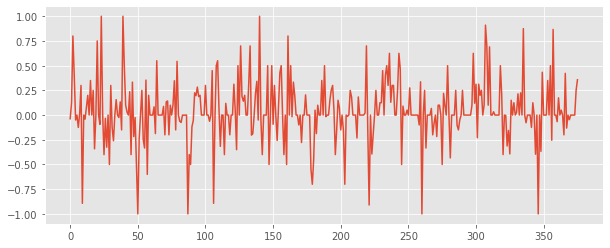

In [52]:
yellow.plot()

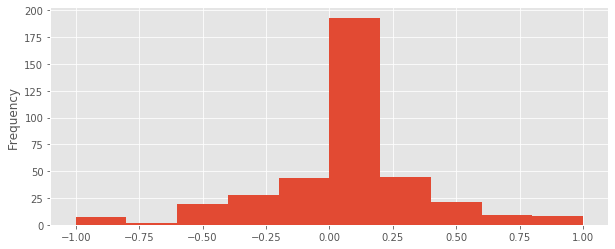

In [48]:
yellow.plot(kind="hist")

In [ ]:
rose_sentiment = TextBlob(open("sea_rose.txt").read())
for item in rose_sentiment.sentences:
    if item.sentiment.polarity < 0:
        print(item)

In [ ]:
def ratio(sequence):
    total = 0
    for item in sequence.sentences:
        if item.sentiment.polarity < .1:
            total = total +1
    ratio = (float(total) / (len)(sequence.sentences)) * 100
    print(ratio)

In [ ]:
ratio(rose_sentiment)

In [ ]:
bronte_sentiment = TextBlob(open("wuthering_heights.txt").read())
for item in bronte_sentiment.sentences:
    if item.sentiment.polarity == -1:
        print(item)

In [ ]:
def ratio(sequence):
    total = 0
    for item in sequence.sentences:
        if item.sentiment.polarity > 0:
            total = total +1
    ratio = (float(total) / (len)(sequence.sentences)) * 100
    print(ratio)

In [ ]:
ratio(bronte_sentiment)

To work with a more sophisticated sentiment analyzer in TextBlob, try the following code, and then experiment with your own sentences.

In [63]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob("I love this library.", analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.7996209910191279, p_neg=0.2003790089808724)

Note: the code below will only work if you've installed the Python NLTK library.

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [60]:
sentences=["raindrops on roses and whiskers on kittens: these are a few of my favorite things","A pox on the pandemic!"]
sid = SIA()
for sentence in sentences:
    ss = sid.polarity_scores(sentence)
    print(ss)

{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.4588}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [61]:
sentences=["The Biltong was dying. Huge and old, it squatted in the center of the settlement park, a lump of ancient yellow protoplasm, thick, gummy, opaque. Its pseudopodia were dried up, shriveled to blackened snakes that lay inert on the brown grass."]
sid = SIA()
for sentence in sentences:
    ss = sid.polarity_scores(sentence)
    print(ss)

{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'compound': 0.3182}


If you want to pull back the curtain to better understand how TextBlob calculates sentiment, here's a great rundown: https://planspace.org/20150607-textblob_sentiment/


If you'd like to learn more about the alternative Naive Bayes classification method, here's a good overview: https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c